In [5]:
from wigglystuff import Slider2D

widget = Slider2D()

In [6]:
widget

Slider2D()

In [7]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

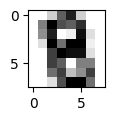

In [18]:
import matplotlib.pylab as plt

# Display the last digit
plt.figure(1, figsize=(1,1))
plt.imshow(X[500].reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [9]:
pca = PCA(n_components=2).fit(X)
X_tfm = pca.transform(X)

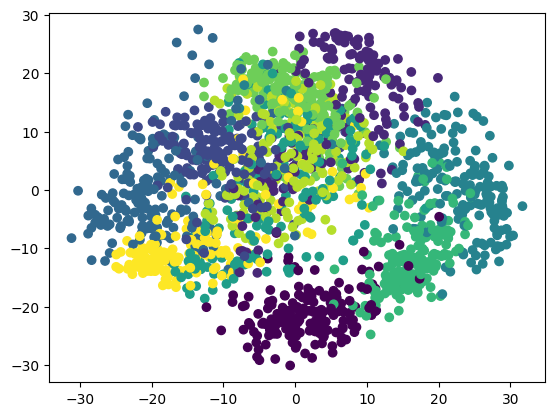

In [13]:
plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y);

In [20]:
from time import time
import ipywidgets
import numpy as np
from wigglystuff import Slider2D

widget = Slider2D()
output_chart = ipywidgets.Output()
output_numbers = ipywidgets.Output()

state = [[0.0, 0.0]]

@output_chart.capture(clear_output=True)
def on_change_chart(change):
    x_new = (1+widget.x)/2 * (X_tfm[:, 0].max() - X_tfm[:, 0].min()) + X_tfm[:, 0].min()
    y_new = (1-widget.y)/2 * (X_tfm[:, 1].max() - X_tfm[:, 1].min()) + X_tfm[:, 1].min()
    
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y, s=10)
    plt.scatter([[x_new]], [[y_new]], color='red', s=50)
    plt.show();


@output_numbers.capture(clear_output=True)
def on_change_numbers(change):
    x_new = (1+widget.x)/2 * (X_tfm[:, 0].max() - X_tfm[:, 0].min()) + X_tfm[:, 0].min()
    y_new = (1-widget.y)/2 * (X_tfm[:, 1].max() - X_tfm[:, 1].min()) + X_tfm[:, 1].min()
    selected = np.array([[x_new, y_new]])
    out = pca.inverse_transform(selected)
    plt.figure(1, figsize=(0.5, 0.5))
    plt.imshow(out[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.show();

widget.observe(on_change_chart, names=['x'])
widget.observe(on_change_numbers, names=['y'])

ipywidgets.HBox([widget, output_chart, output_numbers])